# Distributions univariées et multivariées

In [1]:
import openturns as ot

## Exercice 1 : loi Beta

- Créer une distribution `Beta` de paramètres suivants :
  - $r=5$ : premier paramètre de forme, 
  - $t=7$ : second paramètre de forme, 
  - $a=9$ : borne inférieure, 
  - $b=10$ : borne supérieure
- Dessiner la PDF, la CDF
- Quelle méthode de l'objet permet de savoir si cette distribution est continue ?

## Solution de l'exercice 1 : loi beta

In [2]:
myBeta = ot.Beta(5.0, 2.0, 9.0, 10.0)
myBeta.isContinuous()

True

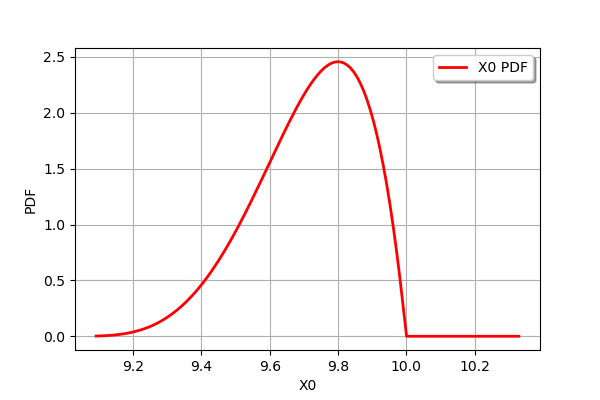

In [3]:
myBeta.drawPDF()

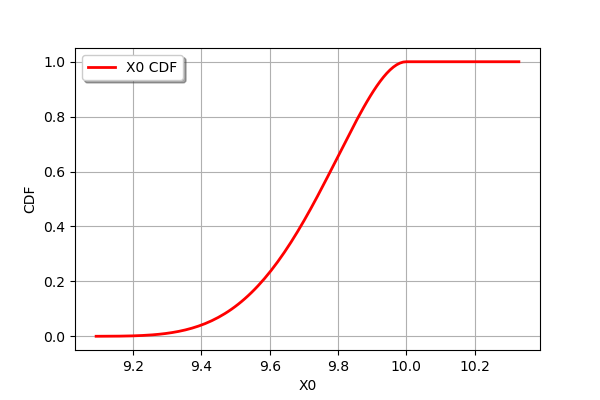

In [4]:
myBeta.drawCDF()

## Exercice 2 : loi exponentielle

- Créer une variable `Exponential` de moyenne $\lambda=3$.
- Dessiner la PDF, la CDF
- Est-elle continue ?

## Solution de l'exercice 2 : loi exponentielle

On remarque que la loi exponentielle d'OpenTURNS peut utiliser un paramètre de localisation $\gamma$ (par défaut $\gamma=0)$.

In [5]:
myExponential = ot.Exponential(3.0)
myExponential.isContinuous()

True

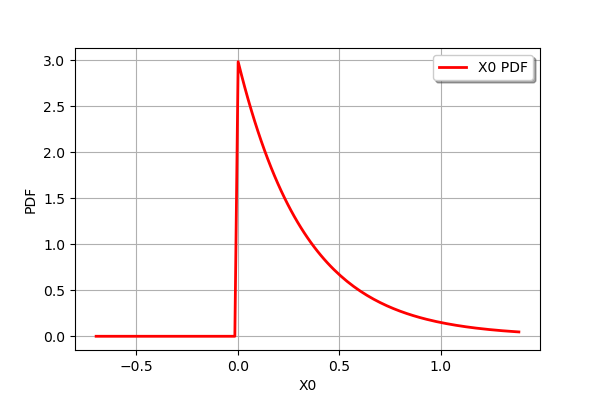

In [6]:
myExponential.drawPDF()

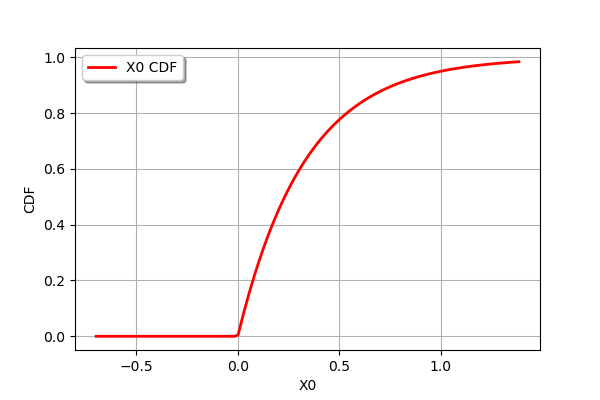

In [7]:
myExponential.drawCDF()

## Exercice 3 : une variable de Bernoulli

- Créer une variable de Bernoulli telle que :

\begin{align*}
P(X=1)&=0.7 \\
P(X=0)&=0.3
\end{align*}

En d'autres termes, créer une variable de Bernoulli de paramètre $p=0.7$

- Dessiner la PDF
- Quel est son support ?

## Solution de l'exercice 3 : une variable de Bernoulli

In [8]:
u = ot.Bernoulli(0.7)
u.getSupport()

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=2 dimension=1 data=[[0],[1]]

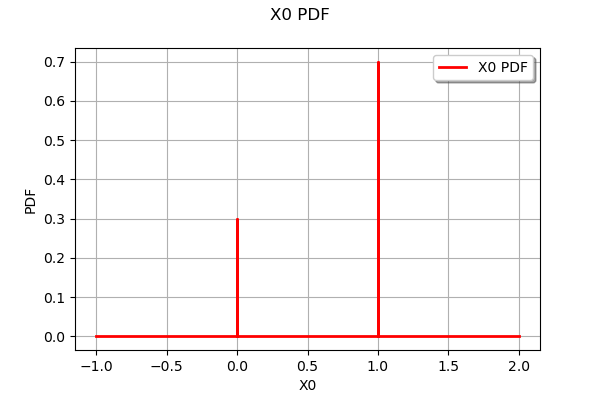

In [9]:
u.drawPDF()

## Exercice 4 : défaillance de disques

Les disques d'une certaine société sont défectueux avec une probabilité égale à 0.01. On fait l'hypothèse que les défaillances sont indépendances entre deux disques. 

La société vend les disques par lots de 10 et offre une garantie de remboursement si plus d'un disque est défectueux dans le lot. 
- Quelle est la probabilité d'avoir un retour de lot ? 
- Si on achète trois lots, quelle est la probabilité qu'exactement un lot soit retourné ?

## Solution de l'exercice 4 : défaillance de disques

Sheldon Ross, Introduction to probability and statistics, 3d Ed., Elsevier, 2004

If X is the number of defective disks in a package, then assuming that customers always take advantage of the guarantee, it follows that X is a binomial random variable with parameters (10, .01). Hence the probability that a package will have to be replaced is $p = P(X>1) = 0.004266$.

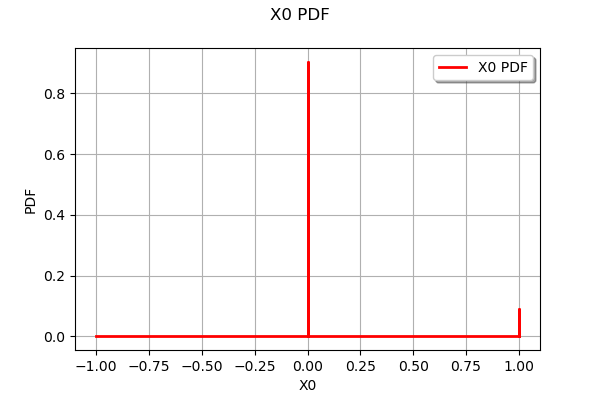

In [10]:
defectbino = ot.Binomial(10, 0.01)
defectbino.drawPDF()

In [11]:
p = defectbino.computeComplementaryCDF(1)
p

0.00426620024283142

Because each package will, independently, have to be replaced with probability p, it follows from the law of large numbers that, in the long run, p percent of the packages will have to be replaced.

It follows from the foregoing that the number of packages that the person will have to return is a binomial random variable with parameters n = 3 and p. Therefore, the probability that exactly one of the three packages will be returned is 0.01269.

In [12]:
returnbino = ot.Binomial(3, p)
returnbino.computePDF(1)

0.012689630881901

## Exercice 5 : pluviosité à Los Angeles

Les données du "National Oceanic and Atmospheric Administration" indiquent que le cumul de précipitations pour une année à Los Angeles suit une loi gaussienne de moyenne 12.08 pouces et d'écart-type 3.1 pouces.

Dans cet exercice, on fait l'hypothèse que les cumuls de précipitations entre deux années sont indépendants.

- Calculer la probabilité d'observer un cumul annuel supérieur à 15 pouces.
- Calculer la probabilité que le cumul de précipitations pendant deux ans soit supérieur à 25 pouces.
- Calculer la probabilité que la différence de cumul entre deux années soit supérieure à 3 pouces.

## Solution de l'exercice 5 : pluviosité à Los Angeles

Sheldon Ross, Introduction to probability and statistics, 3d Ed., Elsevier, 2004

Soit X la variable aléatoire correspondant à la précipitation annuelle en pouces. Par hypothèse, la variable $X$ est une variable gaussienne de moyenne 12.08 et d'écart-type 3.1. La probabilité d'observer une précipitation supérieure à 15 pouces est $P(X>15) = 0.1731$.

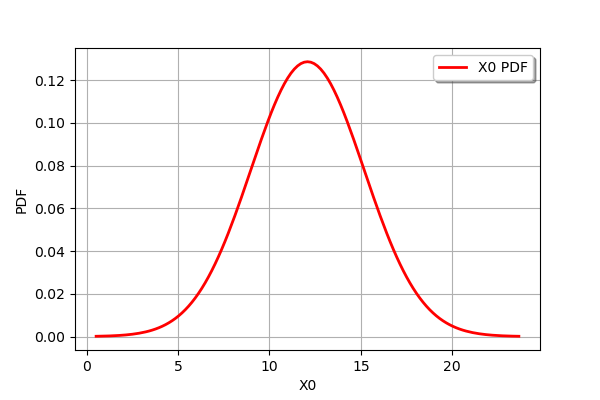

In [13]:
x = ot.Normal(12.08, 3.1)
x.drawPDF()

In [14]:
x.computeComplementaryCDF(15.0)

0.17311283588095572

Let $X_1$ and $X_2$ be the precipitation totals for the next 2 years. La variable aléatoire associée à la précipitation cumulée sur deux années est donc $Y = X_1 + X_2$. On souhaite calculer $P(X_1 + X_2 > 25)$.

Nous pouvons directement utiliser l'arithmétique des distributions.

In [15]:
y = x + x
y.computeComplementaryCDF(25)

0.42402654613788326

On obtient $P(X_1 + X_2 > 25) = 0.4240$.

Le texte de Ross est fondé sur le calcul suivant. On suppose que 

$$
E(X_1) = E(X_2) = \mu
$$

et 

$$
V(X_1) = V(X_2) = \sigma^2
$$

où $\mu$ et $\sigma$ sont la moyenne et l'écart-type des variables gaussiennes $X_1$ et $X_2$. 

Les propriétés de la loi gaussienne impliquent que la moyenne et la variance sont :

\begin{align*}
E(Y) &= E(X_1 + X_2)= E(X_1) + E(X_2) = 2\mu \\
V(Y) &= V(X_1 + X_2)= V(X_1) + V(X_2) = 2\sigma^2,
\end{align*}

où la seconde égalité est justifiée par le faite que les variables sont indépendantes.

In [16]:
import numpy as np

muX = 12.08
sigmaX = 3.1
varianceX = sigmaX ** 2
muY = 2 * muX
varianceY = 2 * varianceX
sigmaY = np.sqrt(varianceY)
print("muY = %f, sigmaY = %f" % (muY, sigmaY))

muY = 24.160000, sigmaY = 4.384062


In [17]:
y = ot.Normal(muY, sigmaY)
y.computeComplementaryCDF(25)

0.42402654613788326

On souhaite calculer la probabilité $P(X_1 > X_2 + 3)$. On a :

$$
P(X_1 > X_2 + 3) = P(X_1 - X_2 > 3)
$$

On considère alors la variable 

$$
Z = X_1 - X_2.
$$

Les propriétés de la loi gaussienne impliquent que la moyenne et la variance sont :

\begin{align*}
E(Z) &= E(X_1 - X_2) = E(X_1) - E(X_2) = 0 \\
V(Z) &= V(X_1 - X_2) = V(X_1) + V(X_2) = 2\sigma^2,
\end{align*}

où la seconde égalité est justifiée par le faite que les variables sont indépendantes.

Dans le script suivant, nous utilisons l'arithmétique des distributions.

In [18]:
z = x - x
z.computeComplementaryCDF(3.0)

0.2468938567843495

On en conclut que $P(X_1>X_2 + 3) = 0.2469$. 

Pour vérifier le calcul, on utilise le script suivant qui repose sur les équations précédentes.

In [19]:
muX = 12.08
sigmaX = 3.1
varianceX = sigmaX ** 2
muZ = 0
varianceZ = 2 * varianceX
sigmaZ = np.sqrt(varianceY)
print("muZ = %f, sigmaZ = %f" % (muZ, sigmaZ))

muZ = 0.000000, sigmaZ = 4.384062


In [20]:
z = ot.Normal(muZ, sigmaZ)
z.computeComplementaryCDF(3.0)

0.2468938567843495

On observe que l'on obtient la même probabilité que précédemment.

## Exercice 6 : taille des hommes

Références : 
- [1] Statistical Abstract of the United States U.S. Census Bureau. Table 209. Cumulative percent distribution
of population by height and sex : 2007-2008, 2012. https://www.census.gov/compendia/statab/2012/tables/12s0209.pdf
- [2] Mark F. Schilling, Ann E. Watkins, and William Watkins. Is human height bimodal ? The American
Statistician, American Statistical Association, 56(3) :223–229, 2002.

Le bureau de recensement des Etats-Unis fournit des statistiques sur ce pays. La table 209 dans [1] présente la distribution de la population par taille et par sexe. Bien que la question soit controversée [2], on pense que la distribution de la taille des hommes suit approximativement la loi Gaussienne.

Soit X la taille d’un homme dont l’âge est entre 20 et 79 ans D’après les données dans [1], on peut
estimer que la moyenne et l’écart-type sont $\mu = 1.7633$ (m) et $\sigma = 0.0680$ (m).

- Quelle est la probabilité que la taille d’un homme soit inférieure à 2 mètres ? Quelle est la probabilité d'avoir une taille supérieure à 2 mètres ?
- Quel est le quantile de niveau $p=0.99$ ? Quel est son sens physique ?

## Solution de l'exercice 6 : taille des hommes

On commence par définir la variable aléatoire associée à la taille des hommes.

In [21]:
x = ot.Normal(1.7633, 0.0680)

Puis on calcule la probabilité $P(X<2)$.

In [22]:
x.computeCDF(2.0)

0.9997501175235604

On calcule ensuite la probabilité $P(X>2)$.

In [23]:
x.computeComplementaryCDF(2.0)

0.00024988247643964456

On calcule enfin le quantile de niveau $p=0.99$. 

In [24]:
x.computeQuantile(0.99)[0]

1.9214916554347772

En d'autres termes,
- la probabilité d'avoir une taille inférieure à 2 mètres est : $P(X<2)=0.9997$,
- la probabilité d'avoir une taille supérieure à 2 mètres est : $P(X<2)=0.0002499$.
- le quantile de niveau 0.99 est égal à 1.921 i.e. la probabilité d'avoir une taille inférieure à 1.921 mètres est égale à 0.99.

## Exercice 7 : une loi gaussienne bidimensionnelle 

- Build a collection of marginals which includes two normal distributions $X \sim \mathcal{N}(0,1)$;
- Create a ComposedDistribution using the previous collection only;
- Create a ComposedDistribution using the previous collection and a `Copula` structure (independent);
- Create a composedDistribution using the previous collection and a `Copula` structure (Normal copula with $\rho=0.6$);
- Get a `Sample` of size $1000$; plot it.

## Solution de l'exercice 7 : une loi gaussienne bidimensionnelle

On commence par créer une liste de deux variables gaussiennes.

In [25]:
coll = [ot.Normal(0, 1)] * 2

On créée ensuite une distribution multivariée dont les maginales sont gaussiennes et la copule indépendante.

In [26]:
ind_dist = ot.ComposedDistribution(coll)

Dans le script suivant, on rend explicite la copule indépendante.

In [27]:
independent_copula = ot.IndependentCopula(2)
dist = ot.ComposedDistribution(coll, independent_copula)

Dans le script suivant, on utilise une copule gaussienne.

In [28]:
R = ot.CorrelationMatrix(2)
R[0, 1] = 0.6
normal_copula = ot.NormalCopula(R)
norm_cop_dist = ot.ComposedDistribution(coll, normal_copula)

Les instructions suivantes permettent de dessiner les isovaleurs des deux distributions.

In [29]:
ind_cop_pdf = ind_dist.drawPDF()
ind_cop_pdf.setLegends(["Ind.Cop"])
ind_cop_pdf.setColors(["red"])
norm_cop_pdf = norm_cop_dist.drawPDF()
norm_cop_pdf.setLegends(["Norm.Cop"])

Pour observer la distribution, on génère deux échantillons de taille 10000.

In [30]:
N = 10000
# Indépendant
ind_sample = dist.getSample(N)
graph1 = ot.Graph("", "x0", "x1", True)
cloud1 = ot.Cloud(ind_sample)
graph1.add(cloud1)
# Dépendance Gaussienne
norm_sample = norm_cop_dist.getSample(N)
graph2 = ot.Graph("", "x0", "x1", True)
cloud2 = ot.Cloud(norm_sample)
graph2.add(cloud2)

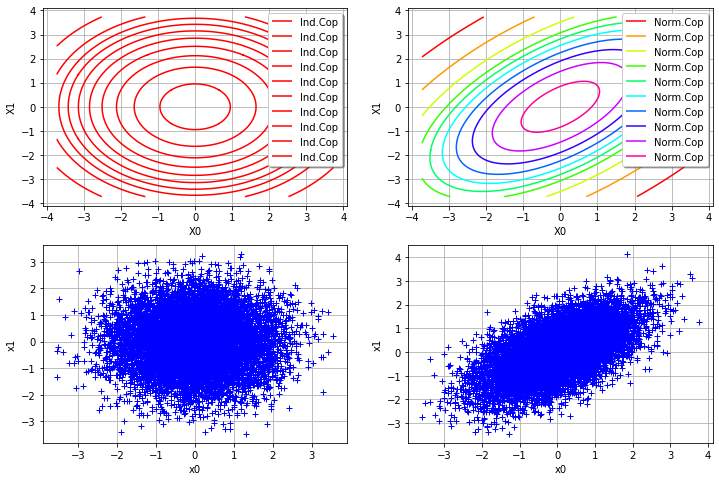

In [31]:
import pylab as plt
import openturns.viewer

fig = plt.figure(figsize=(12, 8))
ax_ind_pdf = fig.add_subplot(2, 2, 1)
_ = ot.viewer.View(ind_cop_pdf, figure=fig, axes=[ax_ind_pdf])
ax_norm_pdf = fig.add_subplot(2, 2, 2)
_ = ot.viewer.View(norm_cop_pdf, figure=fig, axes=[ax_norm_pdf])
ax_x_ind = fig.add_subplot(2, 2, 3)
_ = ot.viewer.View(graph1, figure=fig, axes=[ax_x_ind])
ax_x_norm = fig.add_subplot(2, 2, 4)
_ = ot.viewer.View(graph2, figure=fig, axes=[ax_x_norm])